In [1]:
import numpy as np
import pandas as pd
import json

In [4]:
with open("data/train_01.json") as f:
    templates = json.load(f)

print(templates)

{'inside': [[0.7295200749361322, 0.7286337326606256], [0.826505923560258, 0.9403158114766519], [0.6023139955320228, 0.4890999051968531], [0.7924301535257385, 0.9724603339895345], [0.3739062132424882, 0.3807945141554343], [0.5213825315815278, 0.7011647516840395], [0.5799489554848042, 0.860210492806848], [0.4472712889659769, 0.23208680582951224], [0.8266928088733442, 0.9708616047497776], [0.2096090384196102, 0.07948946448504302], [0.33832612728389067, 0.4113630733104253], [0.68383264433507, 0.9003136248995234], [0.3974079484193441, 0.44643242592599985], [0.26193673674112883, 0.20727182114712916]], 'outside': [[0.846590438950232, 0.12680486596335516], [0.11671041192819076, 0.8523469688748586], [0.8939436660435063, 0.20441969005621619], [0.196515524259539, 0.7563403480339516], [0.762462325724514, 0.17675381094088127], [0.8646206065391742, 0.4289513713302239], [0.7086382515784717, 0.1718070095596751], [0.07308462517167347, 0.7068687883532849], [0.7429722924973284, 0.19681071128913086], [0.6

In [5]:
dict_in = {}
dict_in['x1'] = [i[0] for i in templates['inside']]
dict_in['x2'] = [i[1] for i in templates['inside']]
dict_out = {}
dict_out['x1'] = [i[0] for i in templates['outside']]
dict_out['x2'] = [i[1] for i in templates['outside']]

In [6]:
in_df = pd.DataFrame(dict_in)
in_df['class'] = -1
out_df = pd.DataFrame(dict_out)
out_df['class'] = 1
df = pd.concat([in_df,out_df]).reset_index()
df.head()

,index,x1,x2,class
0,0,0.729520,0.728634,-1
1,1,0.826506,0.940316,-1
2,2,0.602314,0.489100,-1
3,3,0.792430,0.972460,-1
4,4,0.373906,0.380795,-1


In [7]:
X = np.array(df[['x1','x2']])
Y = np.array(df["class"])

x=[[1,0,0,0,0,0],[0,1,0,0,0,0]]
y=[1,1]

for i in range(X.shape[0]):
    x.append([X[i][0]**2,X[i][1]**2,X[i][0]*X[i][1],X[i][0],X[i][1],1])
    y.append(Y[i])
print(len(x))

31


In [8]:
from numpy import linalg
A = np.ones(6)
i=0
while True:
    Cig = np.array([[A[0],A[2]/2],[A[2]/2,A[1]]])/(A[1]*A[0]-(A[2]/2)**2)
    wb,vb = linalg.eigh(Cig)
    j=0
    for i in range(2):
        if wb[i]<0:
            x.append([vb[i][0]**2, vb[i][1]**2, vb[i][0]*vb[i][1], 0, 0, 0])
            y.append(1)
            j +=1
    while (i < len(x) and y[i]*A.dot(x[i]) > 0):
        i += 1
    if i == len(x): 
        break
    r = (np.linalg.norm(x[i])**2-A.dot(x[i]))/(np.linalg.norm(A)**2-2*y[i]*A.dot(x[i])+y[i]**2 * np.linalg.norm(x[i])**2)
    A = A*r + (1-r)*y[i]*np.array(x[i])
    for t in range(j):
        x.pop(len(x)-1)
    i = 0
print(A)

[ 0.03832503  0.05016964 -0.09057632  0.00815393 -0.01528797 -0.00337921]


In [9]:
z = np.random.rand(1000,2)
z

array([[0.60192596, 0.81099474],
       [0.10078239, 0.74301359],
       [0.0051519 , 0.11761608],
       ...,
       [0.75228319, 0.86505958],
       [0.75987505, 0.47006436],
       [0.64811469, 0.57040453]])

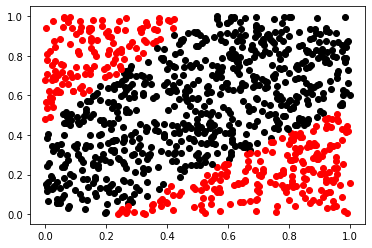

In [11]:
import matplotlib.pyplot as plt
Z = [[z[i][0]**2, z[i][1]**2,z[i][0]*z[i][1],z[i][0],z[i][1],1] for i in range(1000)]
j=0
for j in range(1000):
    if A.dot(Z[j]) > 0:
        plt.scatter(z[j][0],z[j][1], c = 'r')
    else:
        plt.scatter(z[j][0],z[j][1], c = 'black')

plt.show()